##### Download vol cube data

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Download the data
from src.data.vol.get_vol_cube_tenors_strikes_dates import get_vol_cube_tenors_strikes_dates
data, opt_tenors, swap_tenors, strikes, dates = get_vol_cube_tenors_strikes_dates()

We apply a logarithmic transformation to the volatility values to make their distribution more dispersed. This enhances the neural network's ability to distinguish between different data points by spreading out the values more effectively.

After that, we use min-max normalization of vols to increase speed of training

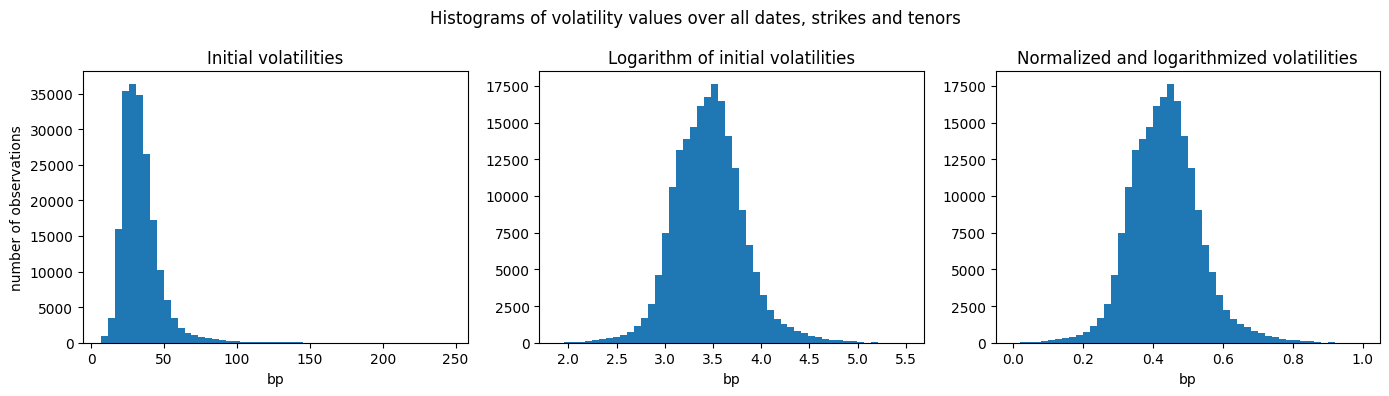

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,4))
fig.suptitle('Histograms of volatility values over all dates, strikes and tenors')

ax1 = fig.add_subplot(1, 3, 1)  
ax1.hist(data.reshape(-1), 50)
ax1.set_title('Initial volatilities')
ax1.set_xlabel('bp')
ax1.set_ylabel('number of observations')

ax2 = fig.add_subplot(1, 3, 2)  
logged_data = np.log(data.reshape(-1))
ax2.hist(logged_data, 50)
ax2.set_title('Logarithm of initial volatilities')
ax2.set_xlabel('bp')

ax3 = fig.add_subplot(1, 3, 3)  
norm_data = (logged_data - logged_data.min()) / (logged_data.max() - logged_data.min())
ax3.hist(norm_data, 50)
ax3.set_title('Normalized and logarithmized volatilities')
ax3.set_xlabel('bp')

plt.tight_layout()
plt.show()